In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.integrate import odeint
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Il dataset artificiale generato con il sistema di Lorenz
> Il sistema di Lorenz è il primo esempio di un sistema di equazioni differenziali a bassa dimensionalità in grado di generare un comportamento caotico nel movimento termico di convezione di un fluido,. Venne scoperto da Edward N. Lorenz, del Massachusetts Institute of Technology, nel 1963.
Il sistema dipende da 3 parametri sigma, rho e beta che rappresentano rispettivamente il numero di Prandtl,  il numero di Rayleigh ed una costantante posta a 8/3.

In [2]:
sigma = 10.     
rho   = 28.
beta  = 8./3.

> Vogliamo generare un dataset di 1000 esempi in 3 dimensione, per t che va da 0s a 1000s

In [3]:
# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 1000
time_points = np.arange(start_time, end_time)


> questa funzione python realizza i dati secondo le 3 leggi che Lorenz trovò

In [4]:
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [5]:
initial_state = [0.1, 0., 0.] #che fa questo?
lorenz_system = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = lorenz_system [:, 0]
y = lorenz_system [:, 1]
z = lorenz_system [:, 2]


In [6]:
from path import Path # gestione dei path per l'import

In [7]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
#RAW_DIR = DATA_DIR / "raw"
#filename = RAW_DIR / "data_students_fixed.csv"
print(DATA_DIR)
lorenz_data = pd.DataFrame(data=lorenz_system, columns=['x', 'y', 'z'])
lorenz_data.to_csv(DATA_DIR /'lorenz_system.csv', index=False)

/home/ec2-user/SageMaker/MASL_project_2019/data


In [8]:
DATA_DIR /'lorenz_system.csv'

Path('/home/ec2-user/SageMaker/MASL_project_2019/data/lorenz_system.csv')

# Generazione delle anomalie nel dataset
> Per creare i dati anomali, gli autori rovesciano le posizione che rappresentano i tempi 850s e 1000s nell'array

In [9]:
z[850:]=np.flip(z[850:])
lorenz_system[:, 2]=z

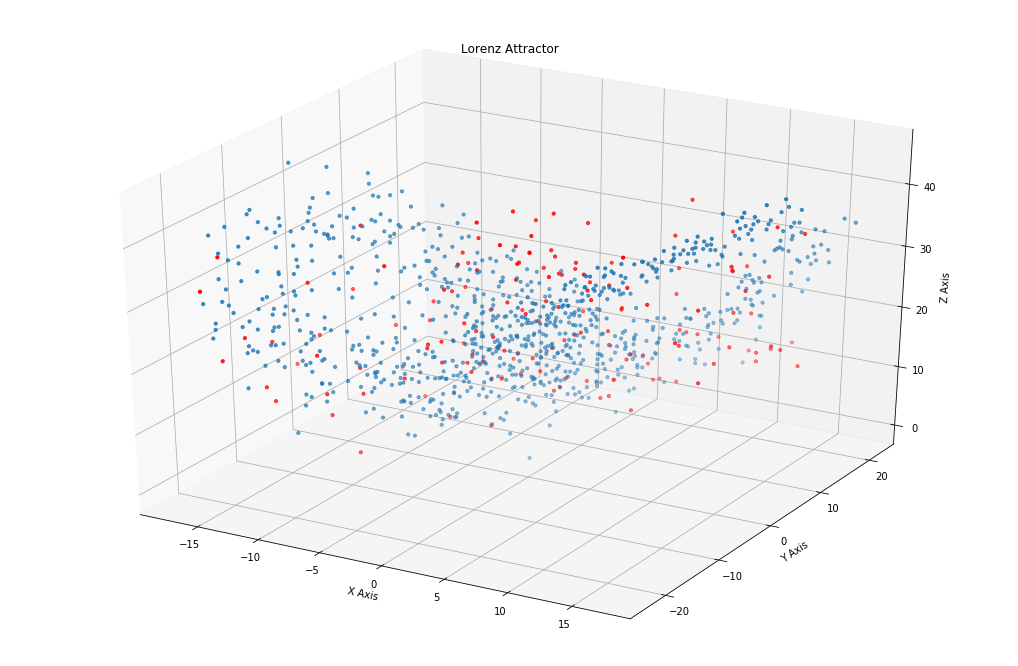

In [10]:
# Plot
fig = plt.figure(figsize=(18,12))
#fig = plt.figure()
zx = fig.gca(projection='3d')
zx.scatter3D(x[850:1000], y[850:1000], z[850:1000],s=10,c="red")
zx.scatter3D(x[0:849], y[0:849], z[0:849],s=10)
zx.set_xlabel("X Axis")
zx.set_ylabel("Y Axis")
zx.set_zlabel("Z Axis")
zx.set_title("Lorenz Attractor")
plt.show()

In [11]:
W=np.random.rand(25,3)
W*=10
W-=5
X=np.dot(W,np.transpose(lorenz_system))
X.shape

(25, 1000)

In [12]:
SC = StandardScaler()
lorenz_std = np.transpose(SC.fit_transform(np.transpose(X)))
print(lorenz_std.shape)# fai standardizz per colonne
#lorenz_std_DF = pd.DataFrame(data=lorenz_std)
#lorenz_std_DF = lorenz_std_DF.to_csv(DATA_DIR /'lorenz_system_std.csv', index=False)

(25, 1000)


In [13]:
#lorenz_std_DF = pd.DataFrame(np.transpose(lorenz_std)) #trasponi la standd
#SC = StandardScaler()
#lorenz_std = SC.fit_transform(lorenz_df) 
#lorenz_std_DF = pd.DataFrame(data=lorenz_std_DF)
#lorenz_std_DF = lorenz_std_DF.to_csv(DATA_DIR /'lorenz_system_std.csv', index=False)
lorenz_std.shape

(25, 1000)

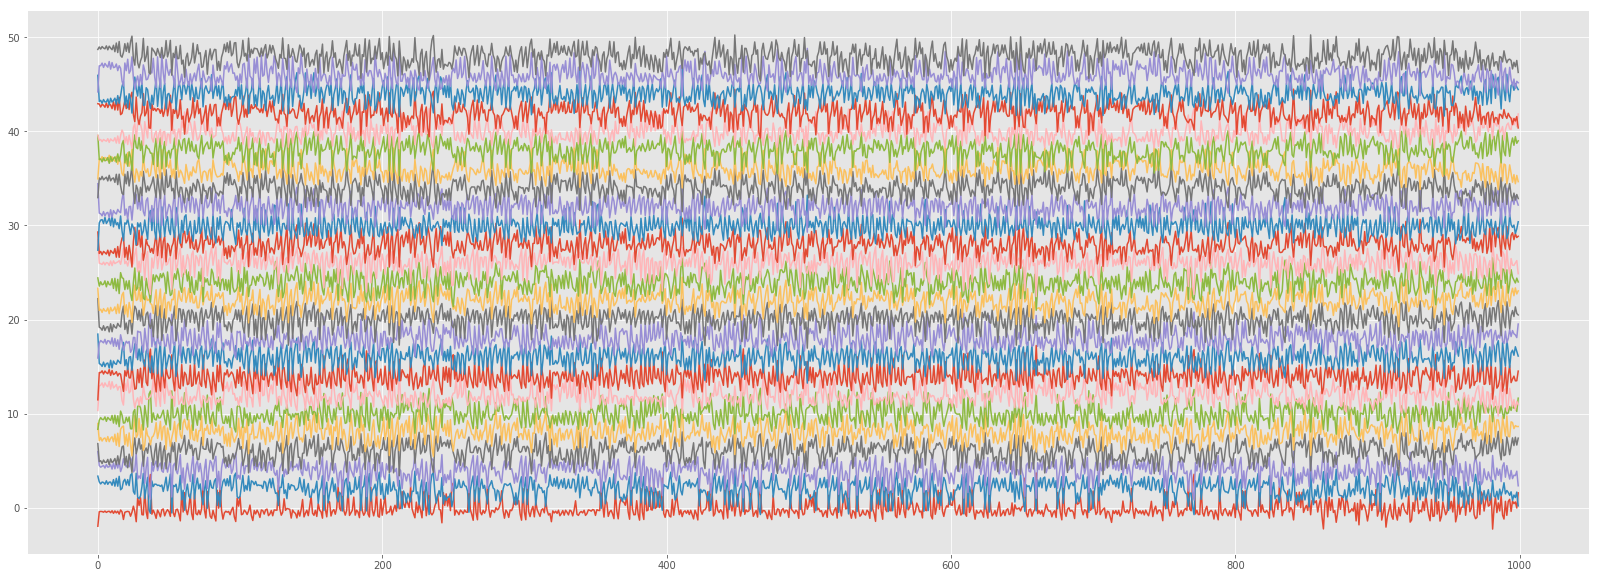

In [14]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    for i in np.arange(0,25):
        plt.plot(time_points, lorenz_std[i,:]+i*2)
    

In [15]:
lorenz_std_DF = pd.DataFrame(lorenz_std).T #trasponi la standd
#lorenz_std_DF = pd.DataFrame(data=lorenz_std_DF)
lorenz_std_DF = lorenz_std_DF.to_csv(DATA_DIR /'lorenz_system_std.csv', index=False)